# Nuages de mots

## Imports et stopwords

In [578]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anoukchapuis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [579]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rue", "tél", "tel", "Tel", "toutes",
       "tous", "agence", "Rossel", "rossel", "Soir", "soir", "Bruxelles", "bruxelles",
       "brux", "écrire", "ecrire", "ecr", "app", "an", "ans", "année", "années", "quelque", "quand",
       "place", "dem", "demande", "francs", "bon", "bonne", "très", "grand", "jamais",
       "rien", "chez", "heures", "temps", "mois", "quelques", "plusieurs", "toute", "leurs", "avant",
       "devant", "téléph", "puis", "dès", "puis", "ailleurs", "jours", "toujours", "mme", "près",
       "année", "ceux", "porte", "trop", "lundi", "mardi", "mercredi", "jeudi", "vendredi",
       "samedi", "dimanche", "janvier", "février", "mars", "avril", "mai", "juin", "juillet",
       "août", "septembre", "octobre", "novembre", "décembre", "lieu", "fois", "téléphone",
       "jour", "celui", "parmi", "seul", "certains", "certain", "selon", "avenue", "déjà",
       "effet", "car", "tant", "enfin", "heure", "semaine", "adr", "vers", "etc",
       "suite", "également", "part", "cours", "peu", "chaque", "alors", "elles", "compte",
       "cependant", "bons", "sait", "cherche", "cas", "prés", "beaucoup", "chaussée",
       "seulement", "matin", "midi", "moment", "réf", "mer", "int", "mise", "rem", "référ",
       "bur", "sem", "pers", "mén", "premier", "première", "assez", "deuxième", "second", "trois",
       "quatre", "cinq", "début", "départ", "fin", "dernier", "mis", "voir", "vient", "mat", "lors",
       "parce", "voici", "dernière", "mètres", "reste", "max", "aven", "six", "sept", "huit", "neuf", "dix",
       "notamment", "laquelle", "saint", "mieux"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée (1960)

In [580]:
# Choisir une année
year = 1960

In [581]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1960-10-30_01-00007.txt',
 'KB_JB838_1960-04-20_01-00016.txt',
 'KB_JB838_1960-01-22_01-00015.txt',
 'KB_JB838_1960-03-25_01-00020.txt',
 'KB_JB838_1960-09-27_01-00009.txt',
 'KB_JB838_1960-12-02_01-00004.txt',
 'KB_JB838_1960-03-04_01-00010.txt',
 'KB_JB838_1960-01-12_01-00011.txt',
 'KB_JB838_1960-06-01_01-00011.txt',
 'KB_JB838_1960-03-16_01-00007.txt',
 'KB_JB838_1960-04-16_01-00002.txt',
 'KB_JB838_1960-10-21_01-00024.txt',
 'KB_JB838_1960-04-05_01-00004.txt',
 'KB_JB838_1960-11-18_01-00017.txt',
 'KB_JB838_1960-12-04_01-00014.txt',
 'KB_JB838_1960-03-13_01-00009.txt',
 'KB_JB838_1960-03-20_01-00014.txt',
 'KB_JB838_1960-04-01_01-00020.txt',
 'KB_JB838_1960-05-28_01-00021.txt',
 'KB_JB838_1960-04-06_01-00008.txt',
 'KB_JB838_1960-06-23_01-00010.txt',
 'KB_JB838_1960-01-10_01-00018.txt',
 'KB_JB838_1960-01-30_01-00007.txt',
 'KB_JB838_1960-05-28_01-00008.txt',
 'KB_JB838_1960-12-21_01-00017.txt',
 'KB_JB838_1960-10-22_01-00003.txt',
 'KB_JB838_1960-04-06_01-00023.txt',
 

In [582]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [583]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [584]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

't DIMANCHE 30 et LUNDI 31 OCTOBRE 1960 LE SOIR Evénement inattendu mais encourageant en football : double victoire belge sur les Belgique bat Hongrie: 2-1 Nos joueurs ont manœuvré avec autant d’habile'

In [585]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [586]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

't DIMANCHE 30 et LUNDI 31 OCTOBRE 1960 LE SOIR Evénement inattendu mais encourageant en football : double victoire belge sur les Belgique bat Hongrie: 2-1 Nos joueurs ont manœuvré avec autant d’habileté qu’à Stockholm, mais, cette fois, ils ont shooté Il y a auatre ans, 72.000 personnes sc pressaient au stade du Heysel pour assister au dernier Belgique - Hongrie. Cette foule bondit de joie « l’issue de la partie parce que les nôtres remportaient la victoire (5-4) Il est curieux de constater qu’e'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [587]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [588]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1960_clean.txt!'

In [589]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'evénement inattendu encourageant football double victoire belge belgique bat hongrie joueurs manœuvré autant habileté stockholm shooté auatre personnes pressaient stade heysel assister belgique hongrie foule bondit joie issue partie nôtres remportaient victoire curieux constater phases similaires occasion but offerte nôtres hasard maladresse défenseurs hongrois croyons demis aile tin rent besogne défensive souvent base mouvements attaque attaques demi jeu assista stockman lippens devancés défens'

## Nuage de mots

### Afficher les termes les plus fréquents


In [590]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('prix', 590), ('maison', 357), ('belgique', 346), ('belge', 333), ('congo', 294), ('trav', 290), ('service', 277), ('pays', 277), ('anvers', 270), ('jeune', 264)]


### Créer, stocker et afficher le nuage de mots

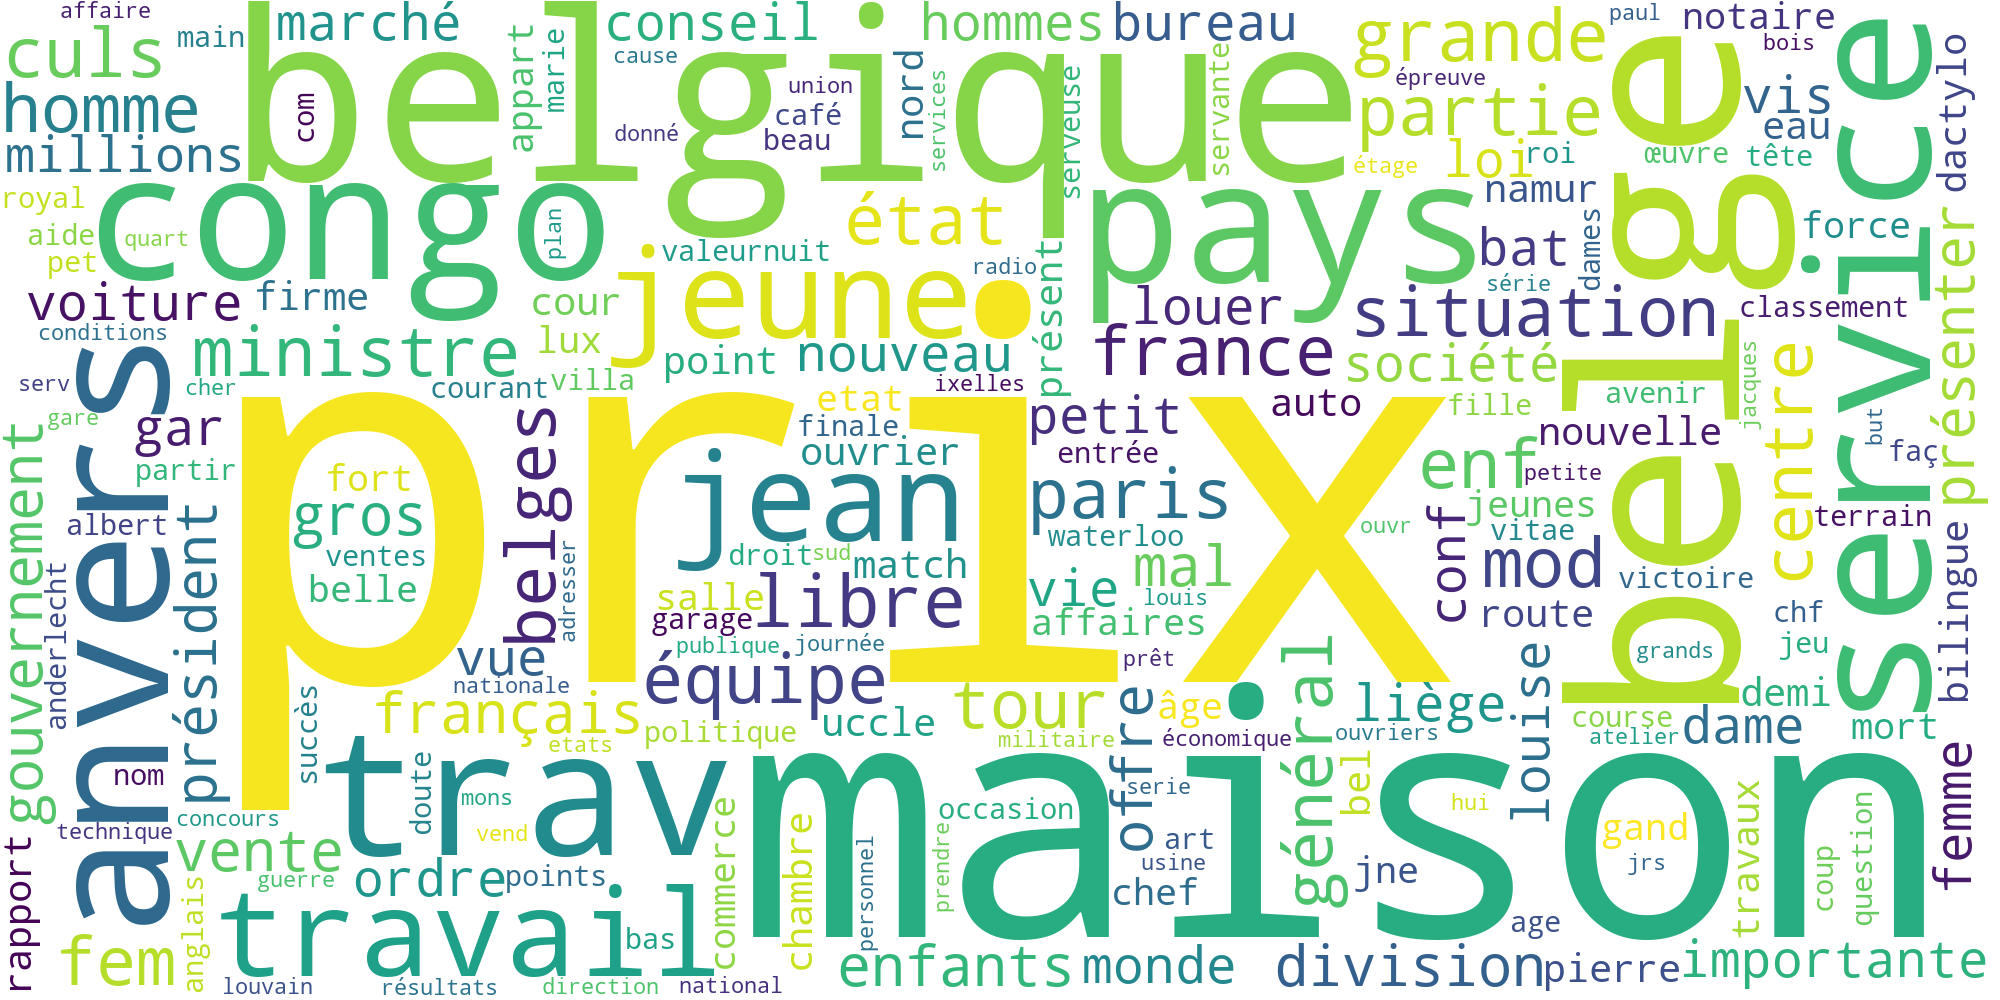

In [591]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))